In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
import os
from scipy import stats
from functools import reduce

In [2]:
cengen_df = pd.read_csv('/Users/Joseph/Desktop/GeneExpressionCSV/CeNGEN_SingleCell_Data.csv')
age_df = pd.read_csv('/Users/Joseph/Desktop/GeneExpressionCSV/Waterston_Age_Data.csv')
tissue_df = pd.read_csv('/Users/Joseph/Desktop/GeneExpressionCSV/Waterston_TissueSpecific_Data.csv')
agewithtissue_df = pd.read_csv('/Users/Joseph/Desktop/GeneExpressionCSV/Waterston_AgeWithTissue_Data.csv')

In [3]:
print(cengen_df.info())
print(age_df.info())
print(agewithtissue_df.info())
print(tissue_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Columns: 173 entries, Worm Gene to XXX
dtypes: float64(169), object(4)
memory usage: 124.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Worm Gene       92 non-null     object 
 1   Human Gene      92 non-null     object 
 2   Gene            92 non-null     object 
 3   WormTranscript  92 non-null     object 
 4   4-cell          92 non-null     float64
 5   44 m            92 non-null     float64
 6   83 m            92 non-null     float64
 7   122 m           92 non-null     float64
 8   161 m           92 non-null     float64
 9   199 m           92 non-null     float64
 10  238 m           92 non-null     float64
 11  277 m           92 non-null     float64
 12  316 m           92 non-null     float64
 13  355 m           92 non-null     float64
 14  39

In [4]:
data_frames=[cengen_df,age_df,agewithtissue_df,tissue_df]
waterston_data=[age_df,agewithtissue_df,tissue_df]

In [5]:
ageagetissue_tf = pd.merge(age_df, agewithtissue_df, on=["Worm Gene", "Human Gene", "Gene", "WormTranscript"])

In [6]:
ageagetissue_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Worm Gene       92 non-null     object 
 1   Human Gene      92 non-null     object 
 2   Gene            92 non-null     object 
 3   WormTranscript  92 non-null     object 
 4   4-cell          92 non-null     float64
 5   44 m            92 non-null     float64
 6   83 m            92 non-null     float64
 7   122 m           92 non-null     float64
 8   161 m           92 non-null     float64
 9   199 m           92 non-null     float64
 10  238 m           92 non-null     float64
 11  277 m           92 non-null     float64
 12  316 m           92 non-null     float64
 13  355 m           92 non-null     float64
 14  393 m           92 non-null     float64
 15  432 m           92 non-null     float64
 16  471 m           92 non-null     float64
 17  510 m           92 non-null     float

In [6]:
merged_df = reduce(lambda  left,right: pd.merge(left,right,on=["Worm Gene", "Human Gene", "Gene", "WormTranscript"]), data_frames).fillna('void')
waterston_merged_df = reduce(lambda  left,right: pd.merge(left,right,on=["Worm Gene", "Human Gene", "Gene", "WormTranscript"]), waterston_data).fillna('void')

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Columns: 265 entries, Worm Gene to Coelomocytes
dtypes: float64(261), object(4)
memory usage: 191.2+ KB


In [9]:
merged_df.head()

,Worm Gene,Human Gene,Gene,WormTranscript,ADA,ADE,ADF,ADL,AFD,AIA,...,Am/PH sheath cells,Socket cells,Excretory cells,Intestine_y,Germline_y,Somatic gonad precursors,Distal tip cells,Vulval precursors,Sex myoblasts,Coelomocytes
0,kvs-5,KCNS3,KCNS3•kvs-5,Y55F3C.3,9.626676,27.367903,94.904827,1.382053,152.641265,0.000000,...,3.31285,2.96528,4.71843,3.2619,0.819216,1.37372,0.0000,0.0000,0.0000,2.99771
1,lam-1,LAMB2,LAMB2•lam-1,W03F8.5,0.000000,0.000000,0.716142,0.000000,0.000000,0.000000,...,100.08000,10.24950,48.27270,38.8991,7.954470,63.49900,5516.8100,24.7764,3770.5800,34.24740
2,gba-4,GBA,GBA•gba-4,Y4C6B.6,0.000000,5.100662,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,108.8410,0.052315,0.00000,0.0000,0.0000,0.0000,0.00000
3,catp-6,ATP13A3,ATP13A3•catp-6,W08D2.5,2.232970,6.029065,5.415445,1.014377,11.928951,0.000000,...,8.04045,109.40900,168.42800,122.4520,853.785000,659.76900,160.4780,307.3660,514.9830,508.42800
4,mccc-1,MCCC1,MCCC1•mccc-1,F32B6.2,1.668519,0.000000,40.338339,0.620578,0.000000,3.104754,...,27.13450,9.50931,19.36280,279.5820,130.250000,87.70710,94.0515,54.4817,48.9662,40.86990


In [7]:
cengen_df.set_index("Gene", inplace=True)
cengen_df.head()

,Worm Gene,Human Gene,WormTranscript,ADA,ADE,ADF,ADL,AFD,AIA,AIB,...,VA12,VB,VB01,VB02,VC,VC_4_5,VD_DD,Vulval_cells,Vulval_muscle,XXX
Gene,,,,,,,,,,,,,,,,,,,,,
KCNS3•kvs-5,kvs-5,KCNS3,Y55F3C.3,9.626676,27.367903,94.904827,1.382053,152.641265,0.000000,63.635893,...,0.000000,0.000000,0.546760,6.952894,0.000000,48.56523,0.756330,0.000000,0.000000,0.0
LAMB2•lam-1,lam-1,LAMB2,W03F8.5,0.000000,0.000000,0.716142,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.548569,0.000000,0.00000,0.000000,0.000000,484.544668,0.0
GBA•gba-4,gba-4,GBA,Y4C6B.6,0.000000,5.100662,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.223489,0.611470,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
ATP13A3•catp-6,catp-6,ATP13A3,W08D2.5,2.232970,6.029065,5.415445,1.014377,11.928951,0.000000,5.758049,...,28.178208,22.810733,20.581387,18.947756,3.847748,0.00000,8.279943,0.000000,4.152868,0.0
MCCC1•mccc-1,mccc-1,MCCC1,F32B6.2,1.668519,0.000000,40.338339,0.620578,0.000000,3.104754,1.321049,...,43.604718,28.356322,23.132765,15.611211,2.129771,12.31051,13.129015,3.268935,7.716176,0.0


In [11]:
# Gene_Orthology_Info=merged_df[['Gene','Worm Gene','Human Gene']].copy()
# print(Gene_Orthology_Info)
# Gene_Orthology_Info.to_csv()

                    Gene Worm Gene    Human Gene
0            KCNS3•kvs-5     kvs-5         KCNS3
1            LAMB2•lam-1     lam-1         LAMB2
2              GBA•gba-4     gba-4           GBA
3         ATP13A3•catp-6    catp-6       ATP13A3
4           MCCC1•mccc-1    mccc-1         MCCC1
..                   ...       ...           ...
87          VPS35•vps-35    vps-35         VPS35
88  FAM49B/CYRIB•R07G3.8   R07G3.8  FAM49B/CYRIB
89          MED13•let-19    let-19         MED13
90           CLCN3•clh-5     clh-5         CLCN3
91       CAB39L•mop-25.2  mop-25.2        CAB39L

[92 rows x 3 columns]


In [8]:
merged_df.set_index("Gene", inplace=True)
waterston_merged_df.set_index("Gene", inplace=True)


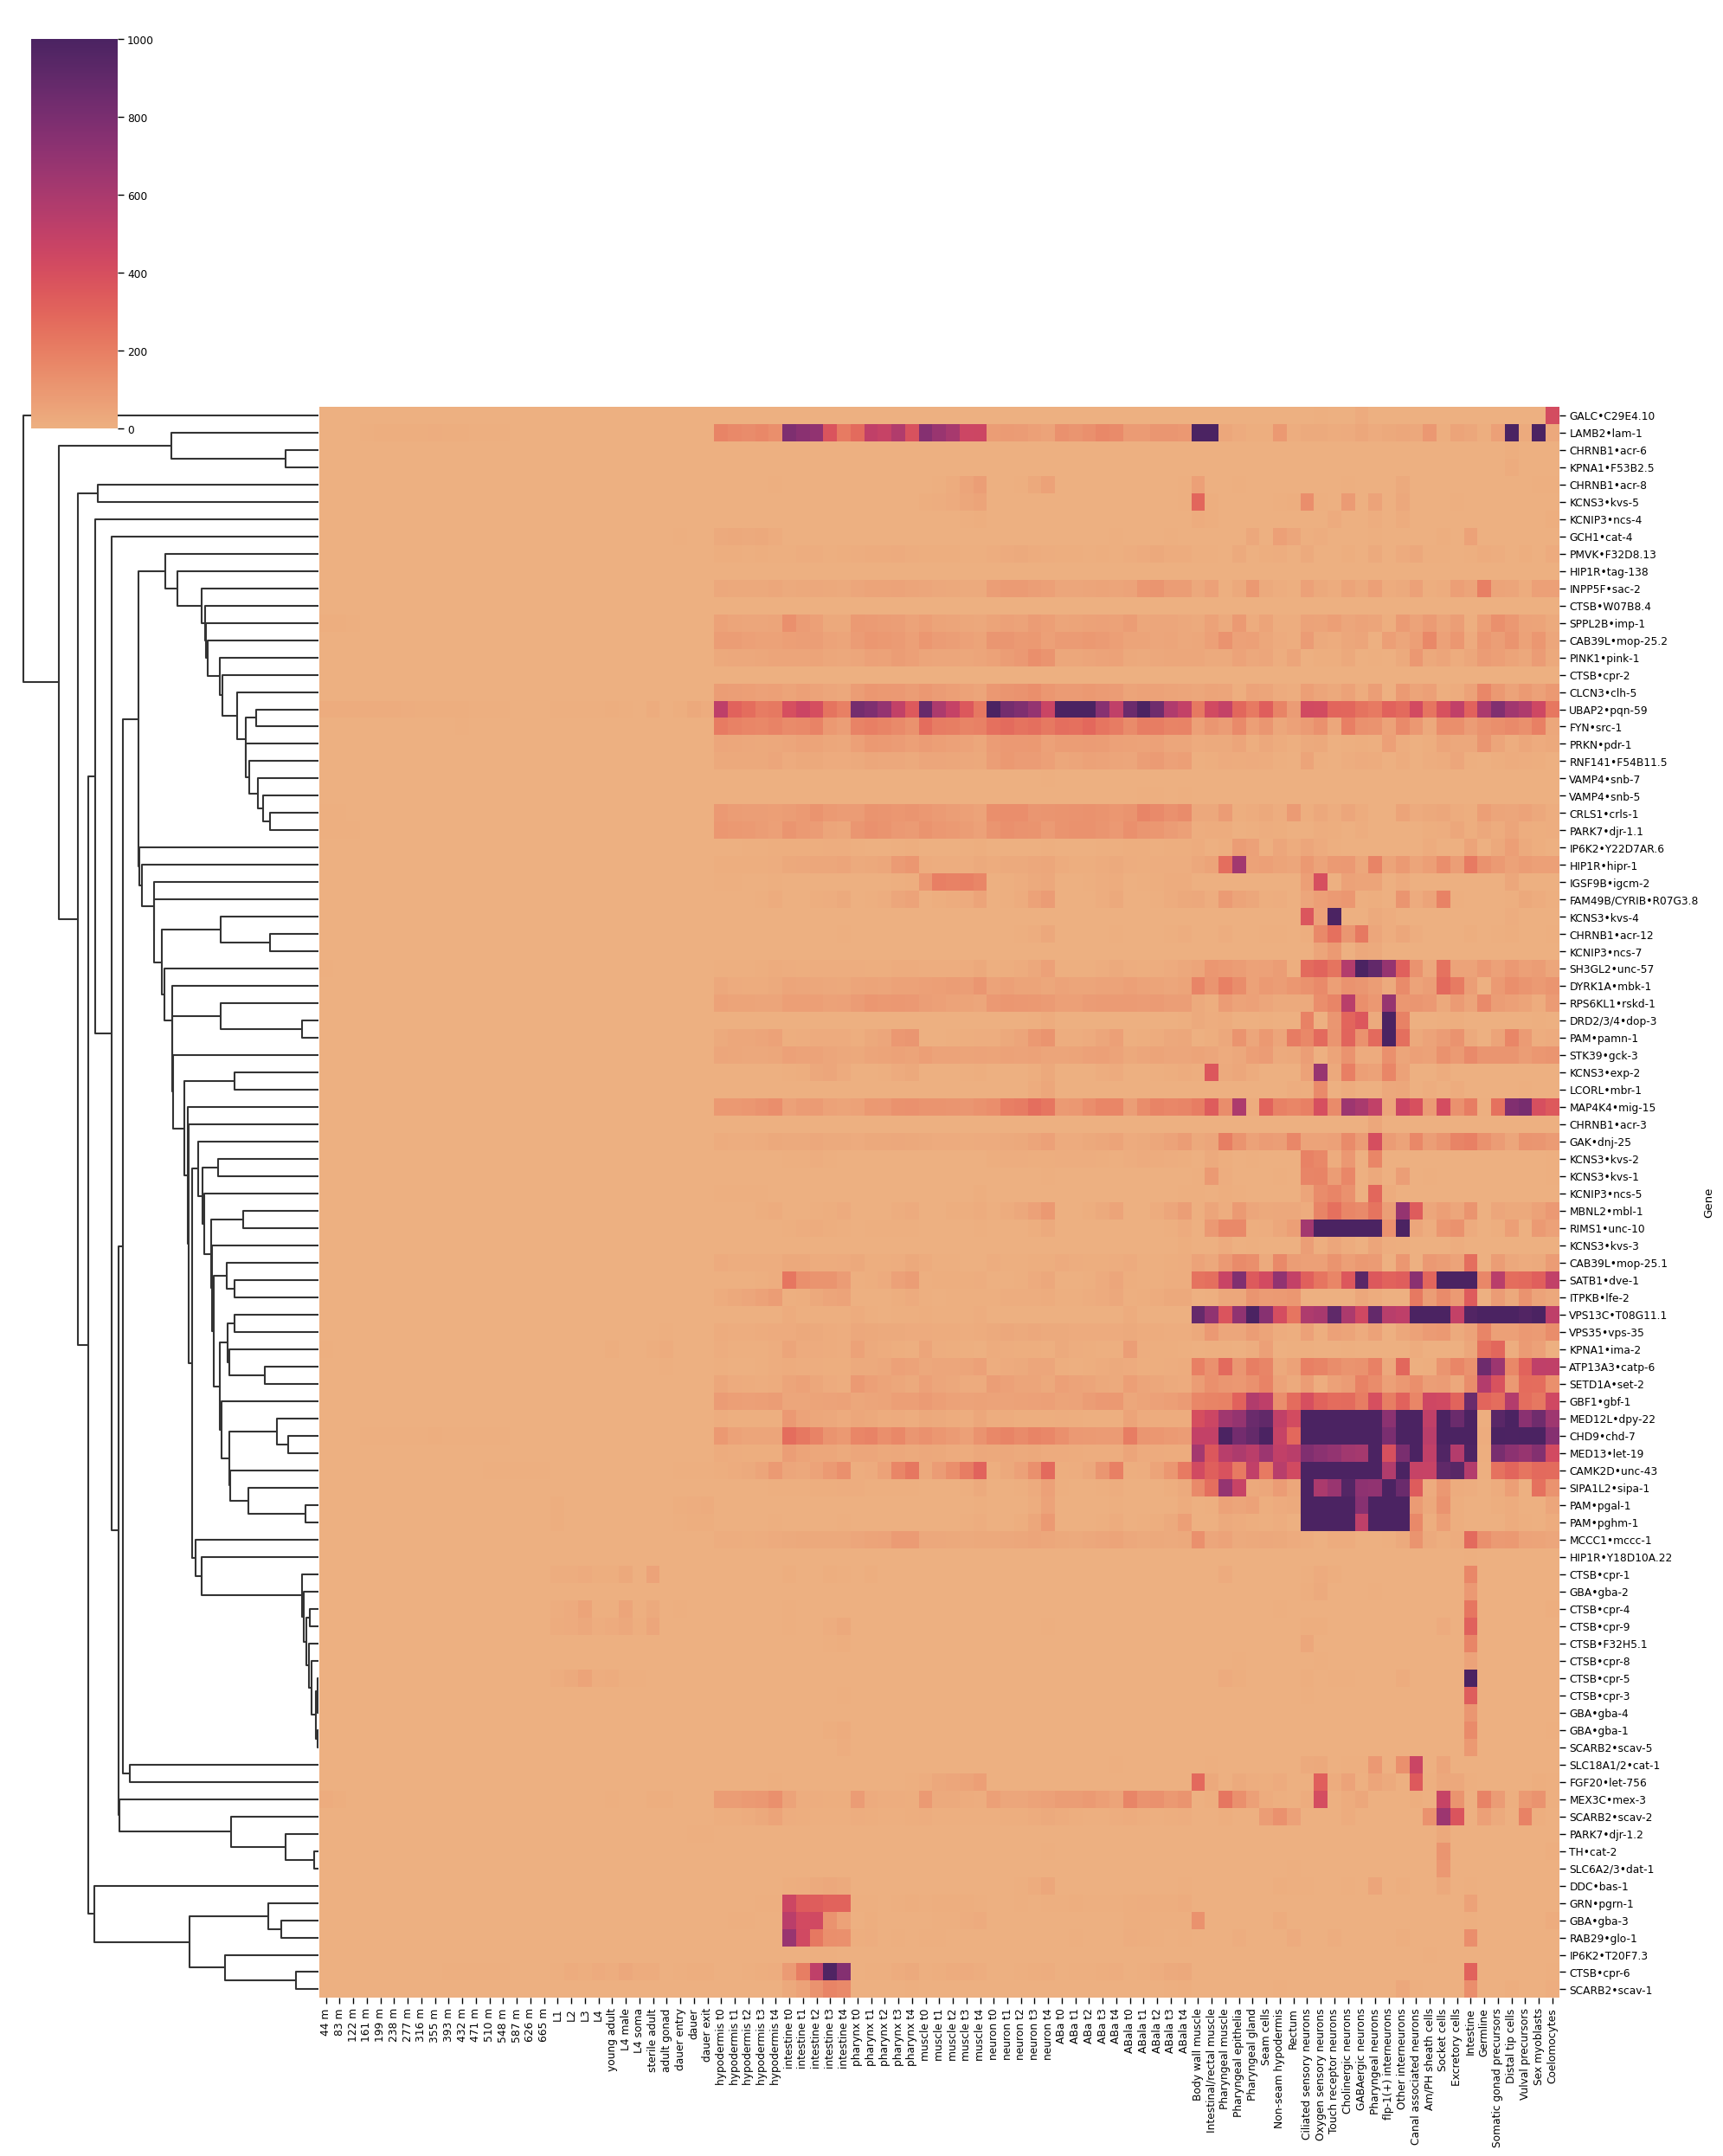

In [12]:
sns.set_context("paper")
g = sns.clustermap(waterston_merged_df.iloc[:,4:],
                   cmap="flare",
                   figsize=(20,25),
                   method="single",
                   metric="correlation", 
                   col_cluster=False,
                   vmax=1000,
                   tree_kws=dict(linewidths=1.5))
g.savefig("/Users/Joseph/Desktop/GeneExpressionCSV/Waterston.png", format='png', dpi=450)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


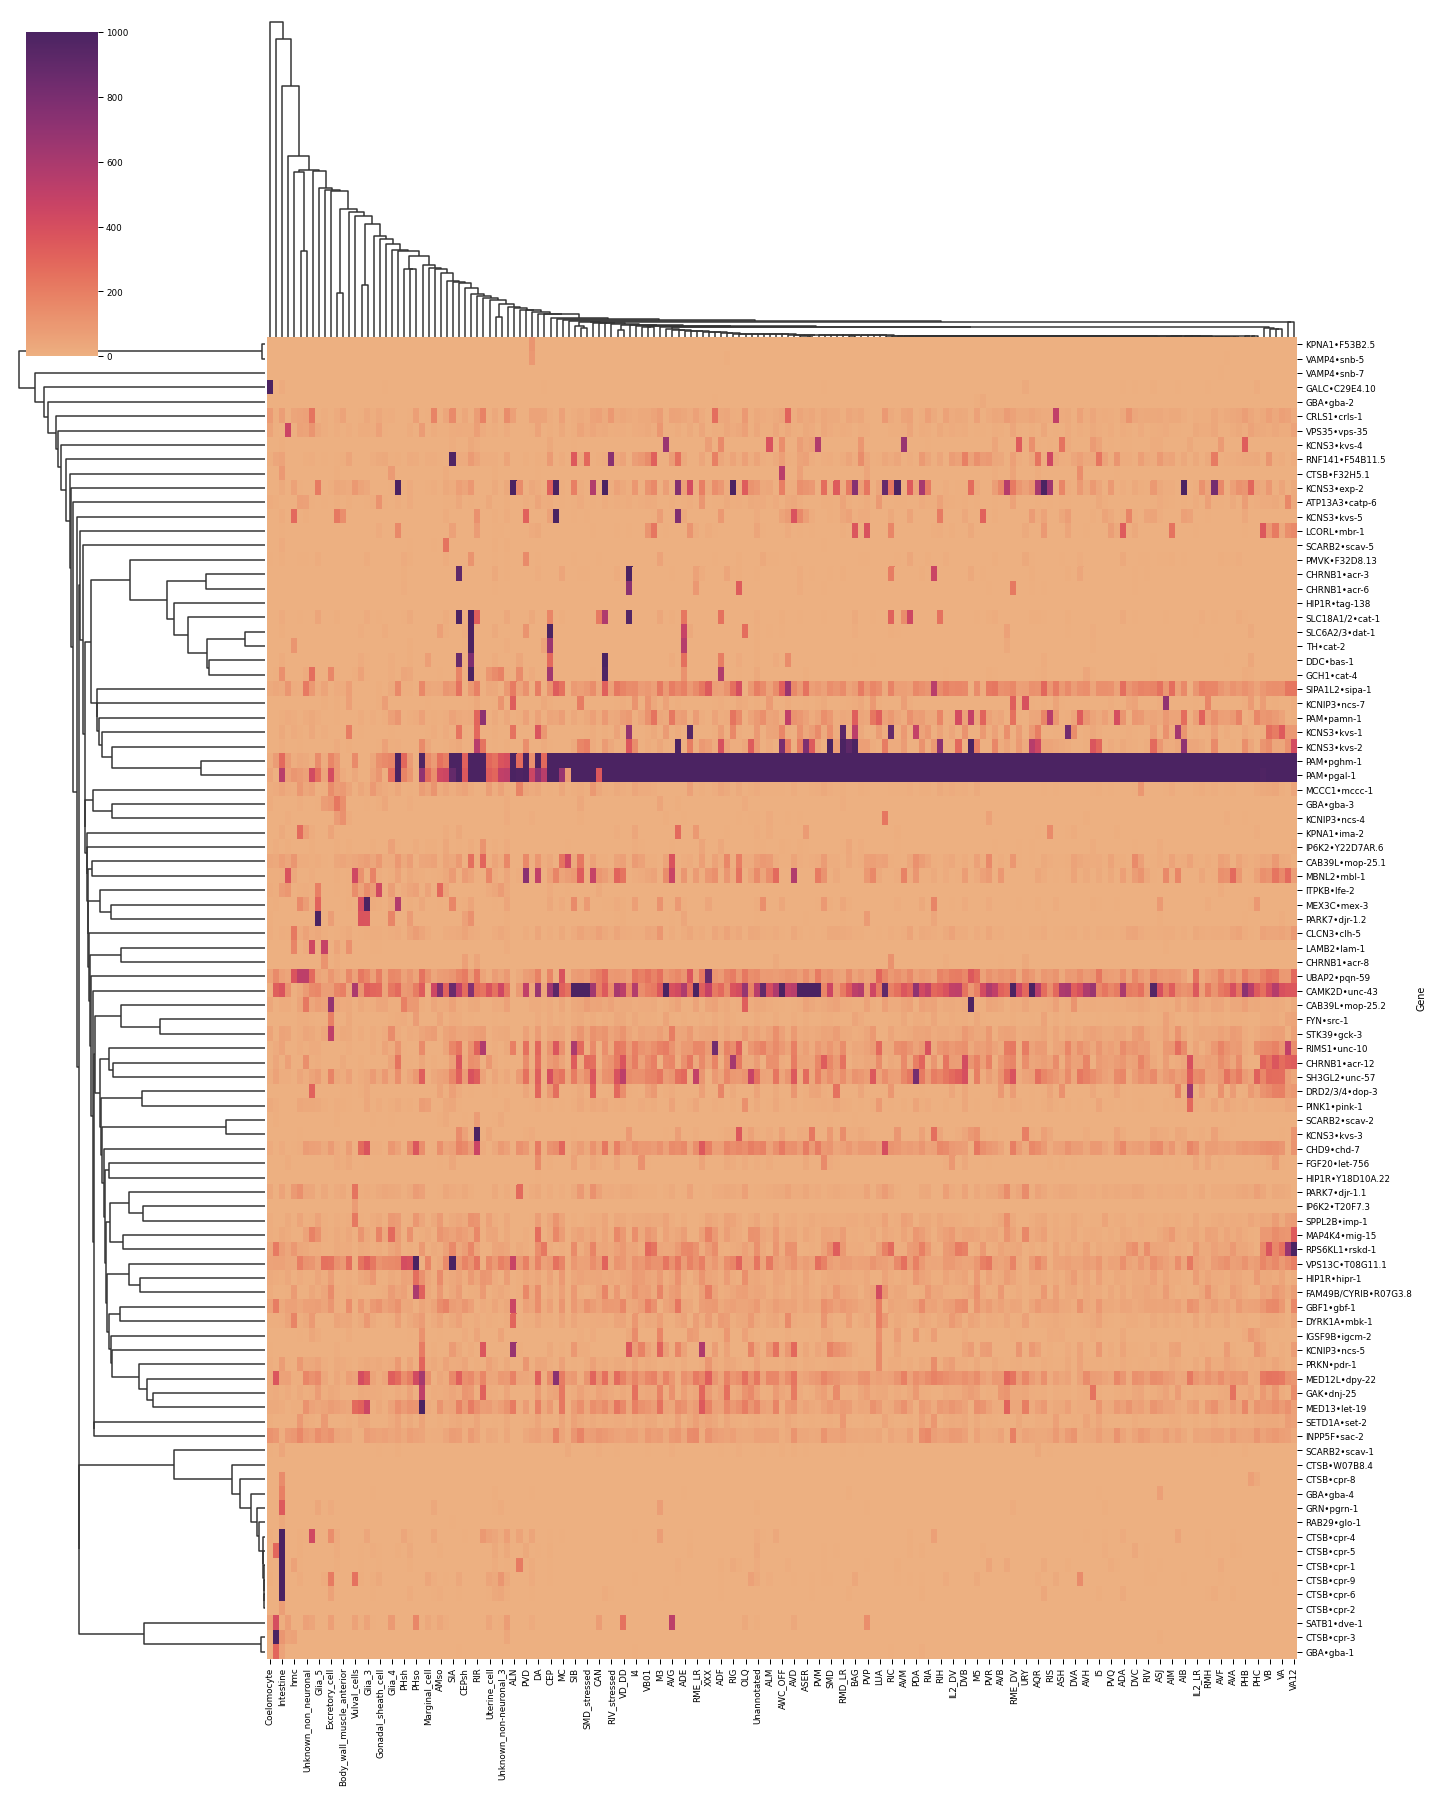

In [29]:
sns.set_context("paper")
g = sns.clustermap(cengen_df.iloc[:,3:],
                   cmap="flare",
                   figsize=(20,25),
                   method="single",
                   metric="correlation", 
                   vmax=1000,
                   tree_kws=dict(linewidths=1.5))
# g.savefig("/Users/Joseph/Desktop/GeneExpressionCSV/CeNGEN.png", format='png', dpi=450)

In [28]:
print(cengen_df.iloc[:,3:])

                            ADA         ADE        ADF        ADL         AFD  \
Gene                                                                            
KCNS3•kvs-5            9.626676   27.367903  94.904827   1.382053  152.641265   
LAMB2•lam-1            0.000000    0.000000   0.716142   0.000000    0.000000   
GBA•gba-4              0.000000    5.100662   0.000000   0.000000    0.000000   
ATP13A3•catp-6         2.232970    6.029065   5.415445   1.014377   11.928951   
MCCC1•mccc-1           1.668519    0.000000  40.338339   0.620578    0.000000   
...                         ...         ...        ...        ...         ...   
VPS35•vps-35          17.617902    0.000000  10.187330   4.943325    4.029252   
FAM49B/CYRIB•R07G3.8  37.581809    5.231943   8.753183  20.881272   22.162676   
MED13•let-19          59.258148  117.994725  53.446721  36.443720   24.942094   
CLCN3•clh-5           13.719730   17.238390  18.460502   7.035720    8.893456   
CAB39L•mop-25.2       15.097

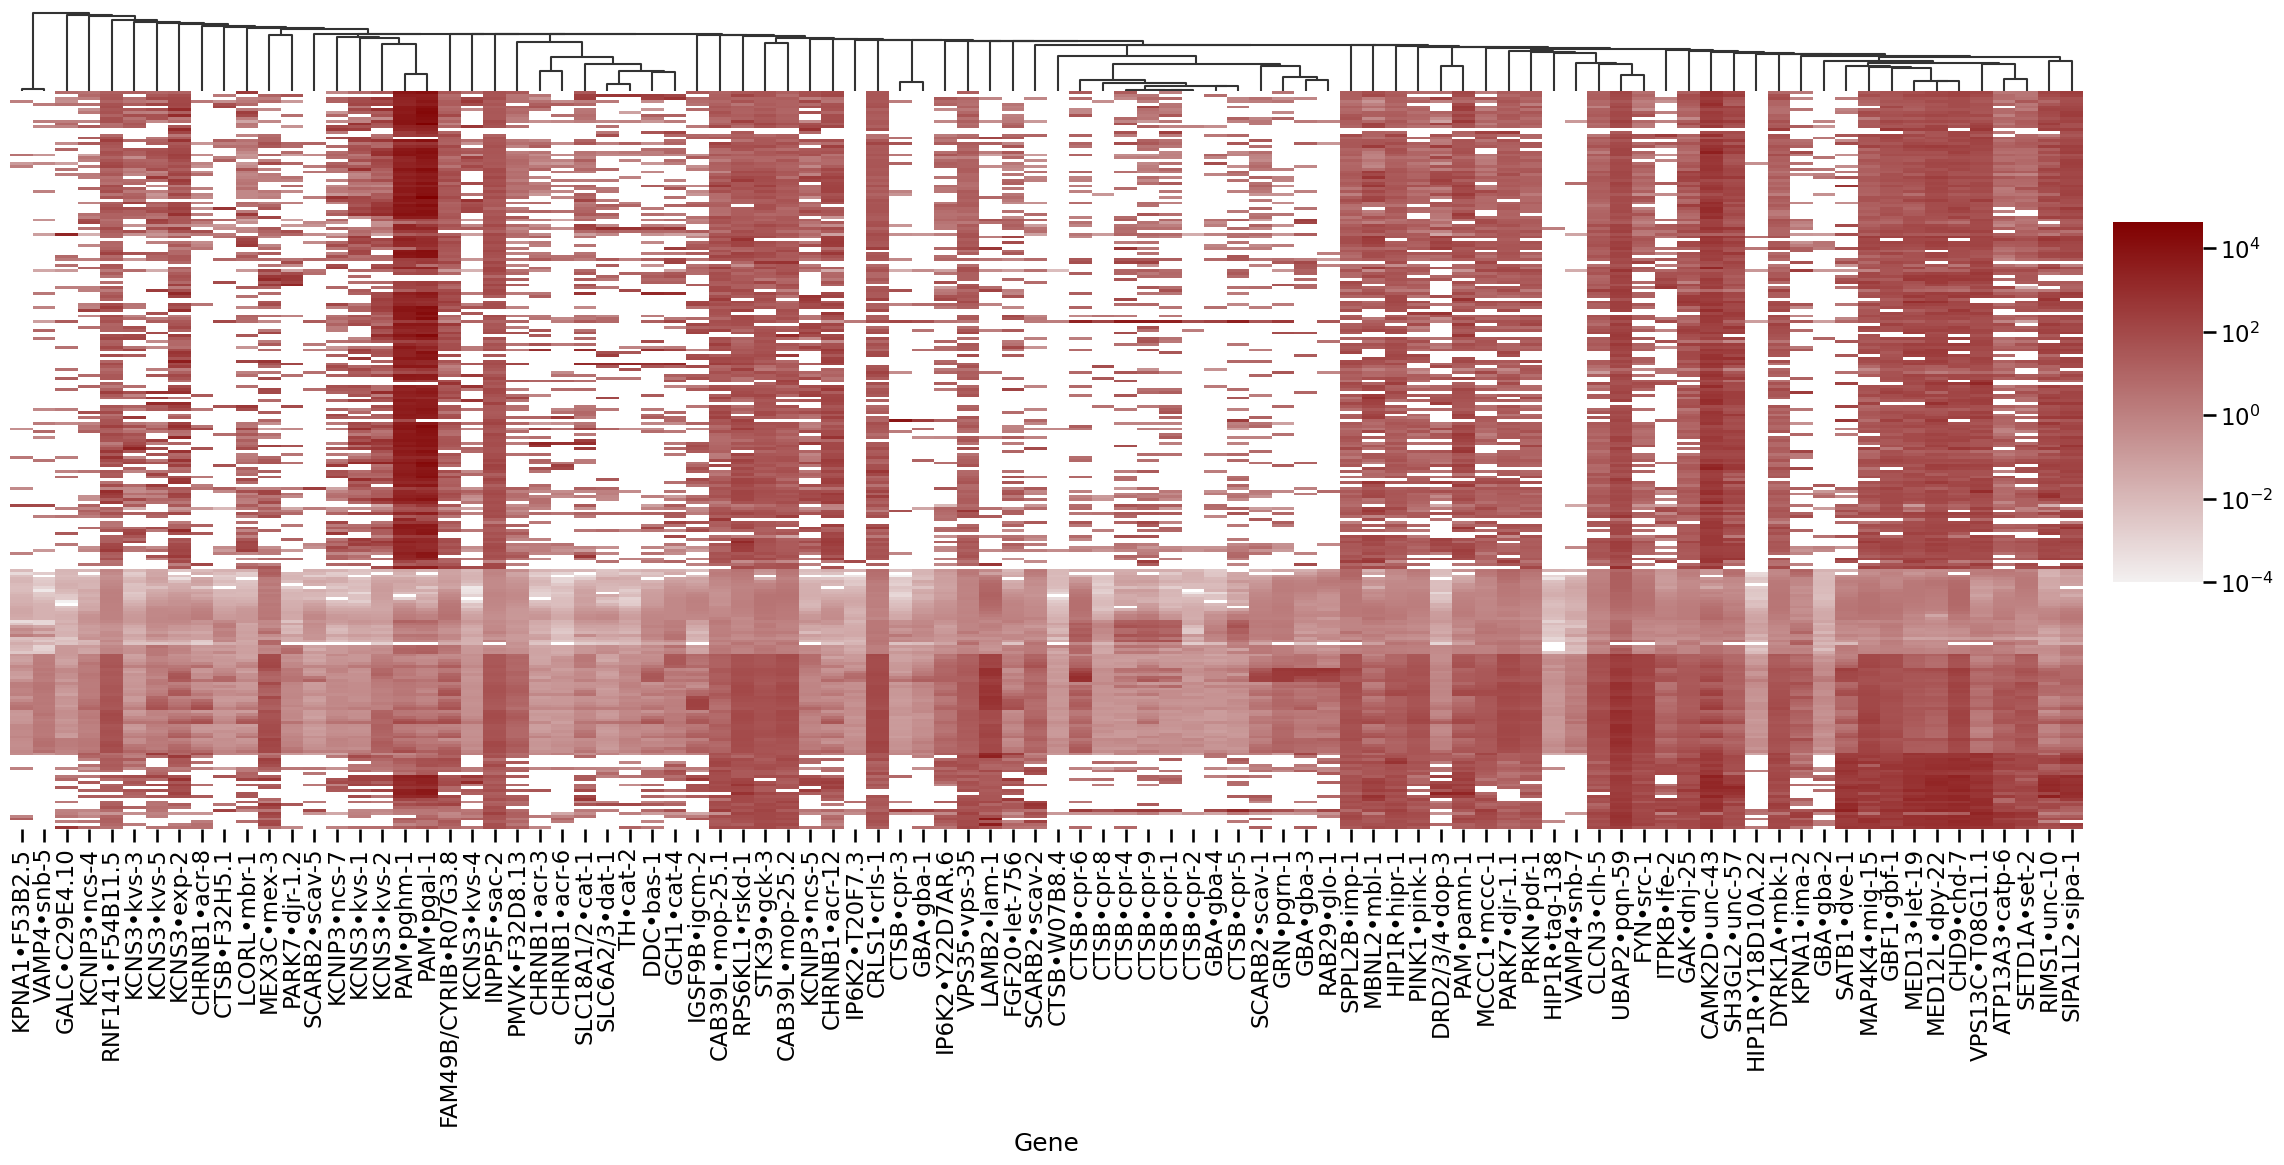

In [12]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
sns.set_context("talk")
g = sns.clustermap(merged_df.iloc[:,3:].transpose(),
#                    merged_df.iloc[:,3:].transpose(), 
                   cmap=sns.light_palette("maroon", as_cmap=True),
                   figsize=(30,12),
#                    row_linkage=dgramlinkage,
                   method="single",
                   row_cluster=False,
                   dendrogram_ratio=(0,0.1),
#                    z_score=0,
                   metric="correlation", 
                   vmax=1000,
                   tree_kws=dict(linewidths=1.5),
                   xticklabels=True,
                   yticklabels=False,
                   norm=LogNorm()
                  )
# g.ax_col_dendrogram.set_visible(False)
g.fig.subplots_adjust(right=0.7)
g.ax_cbar.set_position((0.71, 0.5, .03, .3))
# dgramlinkage = g.dendrogram_row.linkage
# den_rows = g.dendrogram_row.reordered_ind
# g.savefig("/Users/Joseph/Desktop/GeneExpressionCSV/merged.png", format='png', dpi=450)
g.savefig("/Users/Joseph/Desktop/PD_Screen_TapHab/Gene_Expression_log.png", format='png', dpi=450)

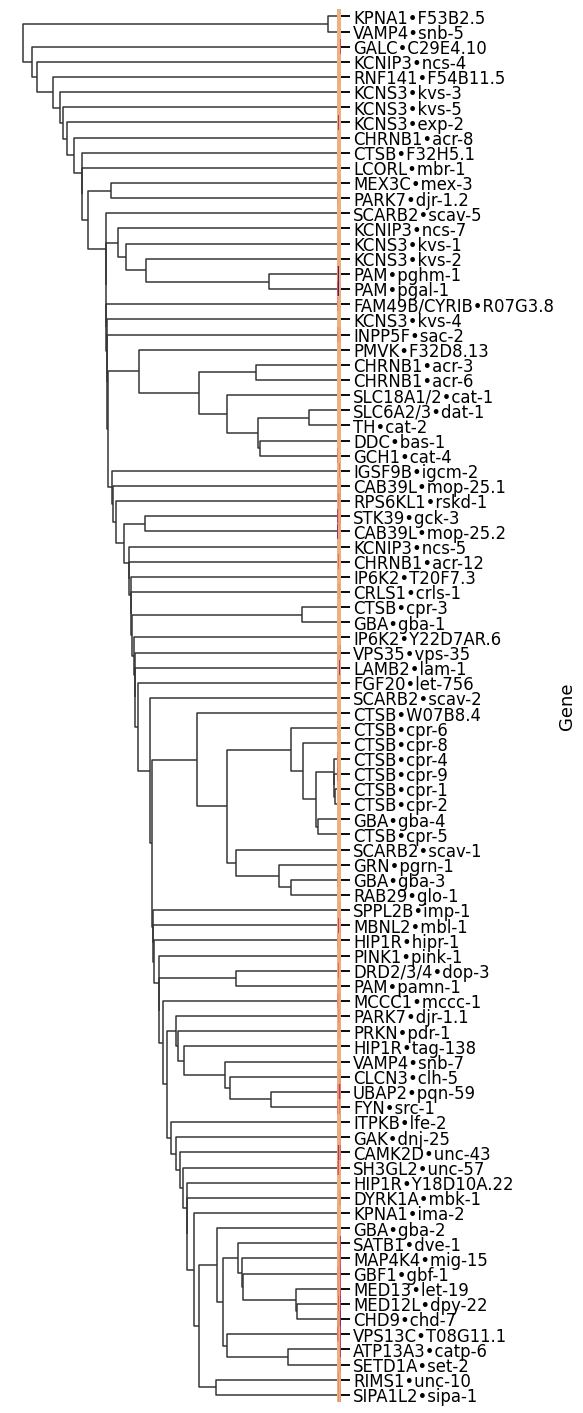

In [144]:
sns.set_context("talk")
g = sns.clustermap(merged_df.iloc[:,3:], 
                   cmap="flare",
                   figsize=(7,20),
#                    row_linkage=dgramlinkage,
                   method="single",
                   col_cluster=False,
                   cbar_pos=None,
                   dendrogram_ratio=(0.99,0),
#                    z_score=0,
                   metric="correlation", 
                   vmax=1000,
                   tree_kws=dict(linewidths=1.5),
                   yticklabels=True,
                   xticklabels=False)
g.fig.subplots_adjust(right=0.7)
# g.ax_cbar.set_position((0.01, 0.01, .03, .3))
# dgramlinkage = g.dendrogram_row.linkage
# den_rows = g.dendrogram_row.reordered_ind
g.savefig("/Users/Joseph/Desktop/GeneExpressionCSV/merged_dendrogram.png", format='png', dpi=450)

In [107]:
print(den_rows)

[6, 15, 14, 35, 40, 68, 0, 66, 36, 76, 38, 45, 65, 33, 44, 31, 70, 48, 52, 88, 18, 61, 71, 29, 49, 25, 17, 82, 12, 69, 26, 23, 75, 79, 91, 80, 39, 42, 9, 77, 84, 10, 87, 1, 13, 20, 62, 28, 64, 67, 74, 73, 78, 2, 63, 24, 58, 8, 34, 56, 43, 16, 86, 27, 54, 4, 83, 21, 60, 7, 90, 46, 47, 53, 81, 5, 50, 59, 41, 55, 85, 22, 37, 19, 89, 32, 51, 57, 3, 11, 30, 72]


In [103]:
for ax,name in zip([g.ax_heatmap, g.ax_col_dendrogram, g.ax_row_dendrogram],
                   ['heatmap.png','col_dendrogram.png','row_dendrogram.png']):
    bbox = ax.get_window_extent()
    inches = g.fig.dpi_scale_trans.inverted().transform_bbox(bbox)
    g.savefig(name, bbox_inches=inches)

In [70]:
dgram = g.dendrogram_row.dendrogram
D = np.array(dgram['dcoord'])
I = np.array(dgram['icoord'])
dgramlinkage = g.dendrogram_row.linkage
den_rows = g.dendrogram_row.reordered_ind


In [145]:
labelnames=[]
for row in merged_df.index:
    labelnames.append(row)
# print(labelnames)
# print(len(labelnames))
label_nums = list(range(0, len(labelnames)))
# print(label_nums)
label_dict = dict(zip(label_nums, labelnames))
# print(label_dict)

In [147]:
reordered_names=[]
for i in den_rows:
    reordered_names.append(label_dict[i])
    
# print(reordered_names)

<function matplotlib.pyplot.show(*args, **kw)>

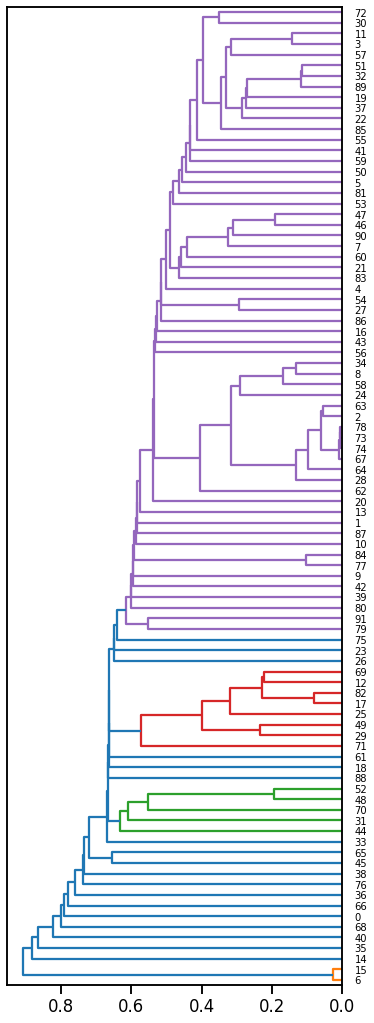

In [125]:
from scipy.cluster import hierarchy
plt.figure(figsize=(6,18))
dn = hierarchy.dendrogram(dgramlinkage,
#                           above_threshold_color='#bcbddc',
                          orientation='left',
#                           labels=reordered_names,
                          leaf_font_size=10)
plt.show